In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
# Set the font family for the text in the plot
rcParams['font.family'] = 'sans-serif'

In [2]:
D, L, K = 44, 288, 228
data_raw = pd.read_csv(os.path.join('./dataset/PeMS7_228', 'PeMSD7_V_228.csv'), header=None).values.reshape(D, L, K)

In [3]:
data_raw.shape

(44, 288, 228)

### Plot for diffusion process

In [4]:
def diffusion_result(arr, t):
    beta_start = 0.0001
    beta_end = 0.2
    diff_steps = 100
    beta = np.linspace(beta_start ** 0.5, beta_end ** 0.5, diff_steps) ** 2
    alpha = 1 - beta
    alpha_hat = np.cumprod(alpha)

    current_alpha = alpha_hat[t]
    print(current_alpha)
    noise = np.random.randn(*arr.shape) * arr

    weighted_noise = ((1.0 - current_alpha) ** 0.5) * noise
    noisy_arr = (current_alpha ** 0.5) * arr + weighted_noise

    return noisy_arr, weighted_noise 

In [ ]:
# Define the window size for smoothing
window_size = 5
start_k = 13
line_width = 0.8
num_seqs = 7

# Calculate the moving average for each line
smoothed_lines = []
for i in range(num_seqs):
    line = data_raw[0, :, start_k + i]
    smoothed_line = np.convolve(line, np.ones(window_size)/window_size, mode='same')
    smoothed_lines.append(smoothed_line)

weighted_noise_arrs = []

for t in range(-1, 50, 1):

    # Plot the smoothed lines
    fig, axes = plt.subplots(nrows=num_seqs, ncols=1, figsize=(3, 3))

    # Decrease vertical spacing between subplots
    plt.subplots_adjust(hspace=0.05)
    weighted_noise_arr = []
    for i, ax in enumerate(axes):
        if i in [0,1,2,3,4,5,6]:
            ax.plot(range(2, 286), smoothed_lines[i][2:-2], label='Ground Truth of X_u', color='g', linewidth=line_width)
            if t >= 0:
                diff_line, curr_noise = diffusion_result(smoothed_lines[i], t)
                ax.plot(range(2, 286), diff_line[2:-2], label='Noisy X_u', color='r',alpha=0.7, linewidth=line_width)
                weighted_noise_arr.append(curr_noise.reshape(curr_noise.shape[0], 1))
        else:
            ax.plot(range(2, 286), smoothed_lines[i][2:-2], label='Ground Truth of X_k', color='b', linewidth=line_width)
            weighted_noise_arr.append(smoothed_lines[i].reshape(smoothed_lines[i].shape[0], 1))
        
        # Remove x-axis ticks
        ax.set_xticks([])

        # Remove y-axis ticks
        ax.set_yticks([])        

        # ax.legend()

    plt.savefig(f"{t}.svg")
    # weighted_noise_arrs.append(np.concatenate(weighted_noise_arr, axis=1))
plt.close()

In [ ]:
# Define the window size for smoothing
window_size = 5
start_k = 13
line_width = 0.8
num_seqs = 7

# Calculate the moving average for each line
smoothed_lines = []
for i in range(num_seqs):
    line = data_raw[0, :, start_k + i]
    smoothed_line = np.convolve(line, np.ones(window_size)/window_size, mode='same')
    smoothed_lines.append(smoothed_line)

weighted_noise_arrs = []

for t in range(-1, 50, 1):

    # Plot the smoothed lines
    fig, axes = plt.subplots(nrows=num_seqs, ncols=1, figsize=(3, 3))

    # Decrease vertical spacing between subplots
    plt.subplots_adjust(hspace=0.05)
    weighted_noise_arr = []
    for i, ax in enumerate(axes):
        if i in [0,1,2,3,4,5,6]:
            if t < 0:
                ax.plot(range(2, 143), smoothed_lines[i][2:-145], label='Ground Truth of X_u', color='g', linewidth=line_width)
                ax.plot(range(144, 286), smoothed_lines[i][144:-2], label='Ground Truth of X_u', color='g', linewidth=line_width)
            else:
                ax.plot(range(2, 143), smoothed_lines[i][2:-145], label='Ground Truth of X_u', color='g', linewidth=line_width)
            if t >= 0:
                diff_line, curr_noise = diffusion_result(smoothed_lines[i], t)
                ax.plot(range(144, 286), diff_line[144:-2], label='Noisy X_u', color='r',alpha=0.7, linewidth=line_width)
                weighted_noise_arr.append(curr_noise.reshape(curr_noise.shape[0], 1))
        else:
            ax.plot(range(2, 286), smoothed_lines[i][2:-2], label='Ground Truth of X_k', color='b', linewidth=line_width)
            weighted_noise_arr.append(smoothed_lines[i].reshape(smoothed_lines[i].shape[0], 1))
        
        # Remove x-axis ticks
        ax.set_xticks([])

        # Remove y-axis ticks
        ax.set_yticks([])

        # ax.legend()

    plt.savefig(f"{t}.svg")
    # weighted_noise_arrs.append(np.concatenate(weighted_noise_arr, axis=1))
plt.close()

In [18]:
smoothed_lines[i][2:-143].shape

(143,)

#### plot noise

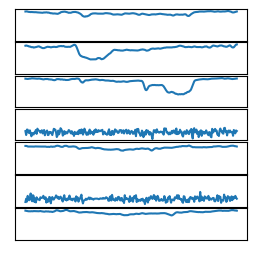

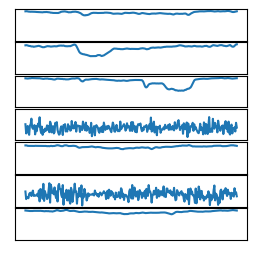

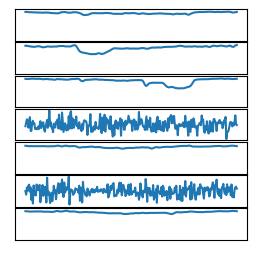

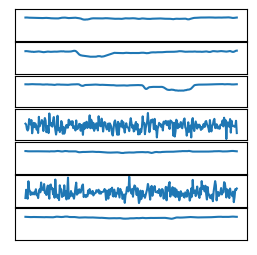

In [33]:
for t in range(len(weighted_noise_arrs[1:])):
    # Plot the smoothed lines
    fig, axes = plt.subplots(nrows=num_seqs, ncols=1, figsize=(3, 3),sharex=True, sharey=True)
    # Decrease vertical spacing between subplots
    plt.subplots_adjust(hspace=0.05)
    for i, ax in enumerate(axes):
        ax.plot(range(2, 286), weighted_noise_arrs[1:][t][:,i][2:-2], linewidth=1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f"noise_{t}.svg")
plt.close()


In [21]:
weighted_noise_arrs[1].shape

(288, 7)

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(3, 3),sharex=True, sharey=True)
for i, ax in enumerate(axes):
    ax.plot(range(2, 286), weighted_noise_arr[i][2:-2], label='weighted noise', color='r', linewidth=line_width)
    # Remove x-axis ticks
    ax.set_xticks([])
    # Remove y-axis ticks
    ax.set_yticks([])

plt.savefig("added_noise.svg")


### plot for TimesNet

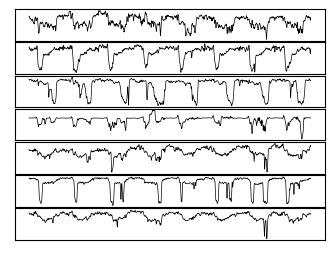

In [65]:
# Define the window size for smoothing
window_size = 5
start_k = 13
line_width = 0.5
num_seqs = 7

# Calculate the moving average for each line
smoothed_lines = []
for i in range(num_seqs):
    line = data_raw[:8, :, start_k + i].reshape(-1)
    smoothed_line = np.convolve(line, np.ones(window_size)/window_size, mode='same')
    smoothed_lines.append(smoothed_line[2:-2])

# Plot the smoothed lines
fig, axes = plt.subplots(nrows=num_seqs, ncols=1, figsize=(4, 3))

# Decrease vertical spacing between subplots
plt.subplots_adjust(hspace=0.05)
weighted_noise_arr = []
for i, ax in enumerate(axes):
    ax.plot(range(len(smoothed_lines[i])), smoothed_lines[i], label='Ground Truth of X_k', color='black', linewidth=line_width)
    
    # Remove x-axis ticks
    ax.set_xticks([])

    # Remove y-axis ticks
    ax.set_yticks([])        

    # ax.legend()
plt.savefig("days_seq.svg")

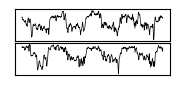

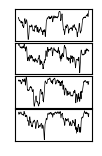

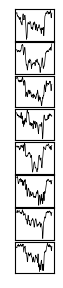

In [64]:
# Define the window size for smoothing
window_size = 5
k = 13
line_width = 0.5
freq = [2,4,8]
total_days = 8 # two weeks

for f in freq:
    num_seqs = f
    # Calculate the moving average for each line
    smoothed_lines = []
    for i in range(num_seqs):
        line = data_raw[int(total_days / f) * i : int(total_days / f) * (i+1), :, k].reshape(-1)
        smoothed_line = np.convolve(line, np.ones(window_size)/window_size, mode='same')
        smoothed_lines.append(smoothed_line[2:-2])

    # Plot the smoothed lines
    fig, axes = plt.subplots(nrows=num_seqs, ncols=1, figsize=(4/num_seqs, 3 * (num_seqs / 7)))

    # Decrease vertical spacing between subplots
    plt.subplots_adjust(hspace=0.05)
    for i, ax in enumerate(axes):
        ax.plot(range(len(smoothed_lines[i])), smoothed_lines[i], label='Ground Truth of X_k', color='black', linewidth=line_width)
        
        # Remove x-axis ticks
        ax.set_xticks([])

        # Remove y-axis ticks
        ax.set_yticks([])        

        # ax.legend()

    plt.savefig(f"TimesNet_freq_{f}.svg")